In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("shared_articles.csv")

In [3]:
df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


## PRELIMINARY DATA PREPROCESSING

In [4]:
df.shape

(3122, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [6]:
columns = df.columns
columns

Index(['timestamp', 'eventType', 'contentId', 'authorPersonId',
       'authorSessionId', 'authorUserAgent', 'authorRegion', 'authorCountry',
       'contentType', 'url', 'title', 'text', 'lang'],
      dtype='object')

In [7]:
df.isna().sum()

timestamp             0
eventType             0
contentId             0
authorPersonId        0
authorSessionId       0
authorUserAgent    2442
authorRegion       2442
authorCountry      2442
contentType           0
url                   0
title                 0
text                  0
lang                  0
dtype: int64

many columns contains many missing values and also we don't need other columns . so, 
removing unneccesary columns

Hint :- you can use **drop()** method to remove the columns

In [8]:
df = df.drop(columns=['timestamp', 'eventType', 'contentId', 'authorPersonId',
       'authorSessionId', 'authorUserAgent', 'authorRegion', 'authorCountry',
       'contentType', 'url',])

In [9]:
df.head()

,title,text,lang
0,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


We will only use English language articles for now.

First check how many different languages are present in this dataset

In [10]:
df["lang"].value_counts()

lang
en    2264
pt     850
la       4
es       2
ja       2
Name: count, dtype: int64

Now, use filtering condition to remove all other values except for english

In [11]:
df = df.loc[df["lang"]=="en",["title","text"]]

In [12]:
df.shape

(2264, 2)

In [13]:
df.head()

,title,text
0,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...
1,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...
2,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...
3,Google Data Center 360° Tour,We're excited to share the Google Data Center ...
4,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...


### Now Check for any duplicates row. if yes, remove it 

Hint: You can use read the documentation for **[checking](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)** and **[removing](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)** the duplicates

In [14]:
df.duplicated().sum()

np.int64(73)

In [15]:
df = df.drop_duplicates()

In [16]:
df = df.reset_index(drop=True)

In [17]:
df.shape

(2191, 2)

In [18]:
df.head()

,title,text
0,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...
1,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...
2,Google Data Center 360° Tour,We're excited to share the Google Data Center ...
3,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...
4,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...


In [19]:
df1 = df.copy()

## EXPLORATORY DATA ANALYSIS

### Couting the number of words in each text rows

Hint :- use your own technique such as making a function to count no of word or manipulation the particular series directly  and make a new column as 'no_of_words'. 
You can use python inbuilt string methods along with regular expressions.
**regular expression** or **regex** is a inbuilt module for advanced pattern matching and text manipulation

firstly, we will remove extra whitespaces if present because it may interfere with the real counting of the words
and also lowerscaping the characters

In [20]:
import re 

def remove_whitespaces(row):
    pattern = r"\s+"
    row = re.sub(pattern," ",row).lower()
    return row

Now apply the **remove_whitespaces** function to **title** and **text** columns

In [21]:
df["title"] = df["title"].apply(remove_whitespaces)
df["text"] = df["text"].apply(remove_whitespaces)

In [22]:
df.head()

,title,text
0,"ethereum, a virtual currency, enables transact...",all of this work is still very early. the firs...
1,bitcoin future: when gbpcoin of branson wins o...,the alarm clock wakes me at 8:00 with stream o...
2,google data center 360° tour,we're excited to share the google data center ...
3,"ibm wants to ""evolve the internet"" with blockc...",the aite group projects the blockchain market ...
4,ieee to talk blockchain at cloud computing oxf...,one of the largest and oldest organizations fo...


#### Now make a column to store the count of no of words 
Hint: You can use split() method 

In [23]:
df["no_of_words"] = df["text"].str.split(" ").apply(len)

# VISUALIZATION
#### "Data is not just numbers; it's a story waiting to be visualized. A well-crafted visualization can tell you a thousand insights."


Apply right visualization techniques to see how the no of words are scattered across each row of data 

Hint: You can use **histogram** either using **matplotlib** or **seaborn** 

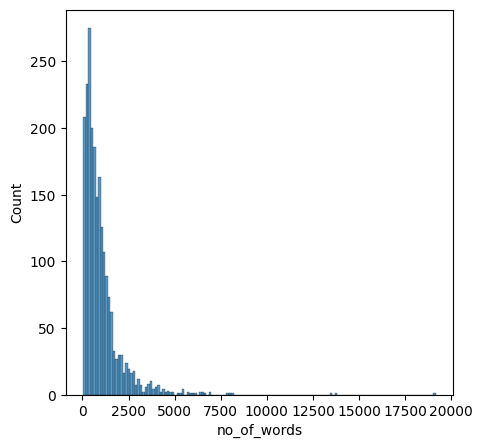

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(x="no_of_words",data=df)
plt.show()

#### Now, visualize the unique no. of words present in each rows for this data 

In [25]:
df["unique_no_of_words"] = df["text"].str.split(" ").apply(set).apply(len)

In [26]:
df.head()

,title,text,no_of_words,unique_no_of_words
0,"ethereum, a virtual currency, enables transact...",all of this work is still very early. the firs...,1072,515
1,bitcoin future: when gbpcoin of branson wins o...,the alarm clock wakes me at 8:00 with stream o...,311,210
2,google data center 360° tour,we're excited to share the google data center ...,272,151
3,"ibm wants to ""evolve the internet"" with blockc...",the aite group projects the blockchain market ...,1354,610
4,ieee to talk blockchain at cloud computing oxf...,one of the largest and oldest organizations fo...,276,169


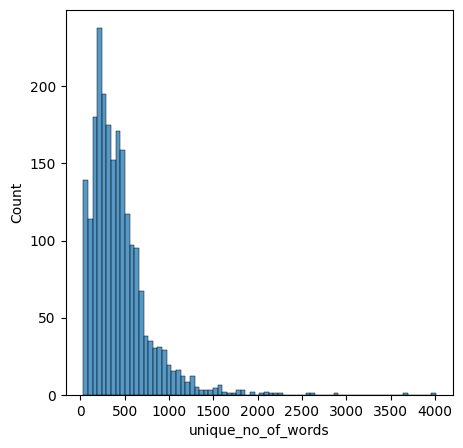

In [27]:
plt.figure(figsize=(5,5))
sns.histplot(x="unique_no_of_words",data=df)
plt.show()

## NLP DATA PREPROCESSING (may vary accoringly to specific NLP Tasks)

### Removal of punctuations and numbers (yo paxi modelling garda thapako)

In [28]:
import string 

def remove_punctuations(row):
    punctuation = re.escape(string.punctuation)
    pattern = f"[{punctuation}0-9]"
    row = re.sub(pattern,"",row)
    return row

In [29]:
df["title"] = df["title"].apply(remove_punctuations)
df["text"] = df["text"].apply(remove_punctuations)

In [30]:
df.head()

,title,text,no_of_words,unique_no_of_words
0,ethereum a virtual currency enables transactio...,all of this work is still very early the first...,1072,515
1,bitcoin future when gbpcoin of branson wins ov...,the alarm clock wakes me at with stream of ad...,311,210
2,google data center ° tour,were excited to share the google data center °...,272,151
3,ibm wants to evolve the internet with blockcha...,the aite group projects the blockchain market ...,1354,610
4,ieee to talk blockchain at cloud computing oxf...,one of the largest and oldest organizations fo...,276,169


### STOPWORD REMOVALS

Stopwords are common words (e.g., "the", "is", "in", "and") that don't carry significant meaning in text analysis. They are typically removed in NLP tasks because they occur frequently across texts but do not contribute to distinguishing meaningful patterns or relationships.

#### Why Remove Stopwords?
- **Reduce noise**: They can dominate text data and hinder meaningful analysis.
- **Improve efficiency**: Removing stopwords reduces dimensionality and computation time.
- **Enhance model performance**: Focusing on important words helps in building better models for tasks like text classification, information retrieval,etc.

You can make your own list of frequently used stopwords or either use stopwords provided by the packages such as **nltk**, **scikit-learn**,etc

In [31]:
import nltk
from nltk.corpus import stopwords

In [32]:
%%time

nltk.download('stopwords')

CPU times: total: 46.9 ms
Wall time: 505 ms


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
words = stopwords.words('english')

In [34]:
len(words)

179

In [35]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
len(ENGLISH_STOP_WORDS)

318

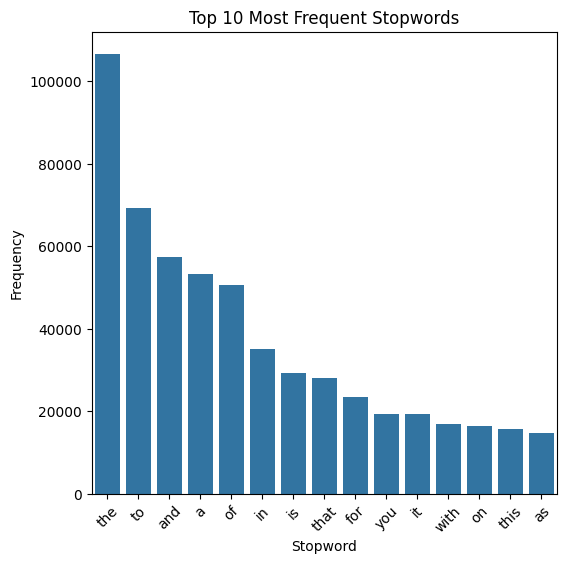

In [36]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

stopwords = [word for text in df['text'] for word in text.split() if word.lower() in ENGLISH_STOP_WORDS]
stopword_counts = Counter(stopwords)

# Plot top 15 stopwords
stopword_freq = stopword_counts.most_common(15)
stopword_words, stopword_freqs = zip(*stopword_freq)

plt.figure(figsize=(6, 6))
sns.barplot(x=list(stopword_words), y=list(stopword_freqs))
plt.title('Top 10 Most Frequent Stopwords')
plt.xlabel('Stopword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [37]:
def remove_stopwords(row):
    word_list = row.split(" ")
    new_word_list = [word for word in word_list if word not in ENGLISH_STOP_WORDS]
    return " ".join(new_word_list)

In [38]:
df_new = pd.DataFrame()

In [39]:
df_new["title"] = df["title"].apply(remove_stopwords)
df_new["text"] = df["text"].apply(remove_stopwords)

In [40]:
df_new.head()

,title,text
0,ethereum virtual currency enables transactions...,work early public version ethereum software re...
1,bitcoin future gbpcoin branson wins usdcoin trump,alarm clock wakes stream advertfree broadcast...
2,google data center ° tour,excited share google data center ° tour youtu...
3,ibm wants evolve internet blockchain technology,aite group projects blockchain market valued ...
4,ieee talk blockchain cloud computing oxfordcon...,largest oldest organizations computing profess...


# STEMMIZATION and LEMMATIZATION 

## Stemmization vs Lemmatization in NLP

### 1. Stemmization
- **Definition**: Reduces words to their root form by removing suffixes using predefined rules.
- **Result**: The root may not be a valid word.
- **Example**:
  - Running → Run
  - Caring → Car
  - Plays → Play
  - Happiness → Happi

### 2. Lemmatization
- **Definition**: Reduces words to their dictionary form (lemma) using context and part-of-speech.
- **Result**: The reduced form is always a valid word.
- **Example**:
  - Running → Run (verb)
  - Better → Good (adjective)
  - Caring → Care (noun/verb)
  - Happiness → Happiness (noun)

### Conclusion:
- **Stemmization** is faster but less accurate.
- **Lemmatization** is more accurate but slower.
- **Deep Learning models** (e.g., BERT, GPT) often reduce the need for both.


In [41]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer  #stemming tool
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\preza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [42]:
stemmer = PorterStemmer()

In [43]:
def stem_words(row):
    tokens = word_tokenize(row)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

In [44]:
%%time
df_new["title"] = df_new["title"].apply(stem_words)
df_new["text"] = df_new["text"].apply(stem_words)

CPU times: total: 25.4 s
Wall time: 25.5 s


In [45]:
df_new.tail()

,title,text
2186,swift articl past year v,past year weve rank nearli swift articl pick s...
2187,amazon take skype gotomeet chime video confere...,amazon launch chime video conferenc chat servi...
2188,codeorg annual report,februari begin year look k comput scienc lands...
2189,jpmorgan softwar doe second took lawyer hour,jpmorgan chase learn machin pars financi deal ...
2190,acquia partner year,acquia partner award program compris categori ...


In [46]:
df_new["data"] = df_new["title"] + " " + df_new["text"]

In [47]:
df_new.tail()

,title,text,data
2186,swift articl past year v,past year weve rank nearli swift articl pick s...,swift articl past year v past year weve rank n...
2187,amazon take skype gotomeet chime video confere...,amazon launch chime video conferenc chat servi...,amazon take skype gotomeet chime video confere...
2188,codeorg annual report,februari begin year look k comput scienc lands...,codeorg annual report februari begin year look...
2189,jpmorgan softwar doe second took lawyer hour,jpmorgan chase learn machin pars financi deal ...,jpmorgan softwar doe second took lawyer hour j...
2190,acquia partner year,acquia partner award program compris categori ...,acquia partner year acquia partner award progr...


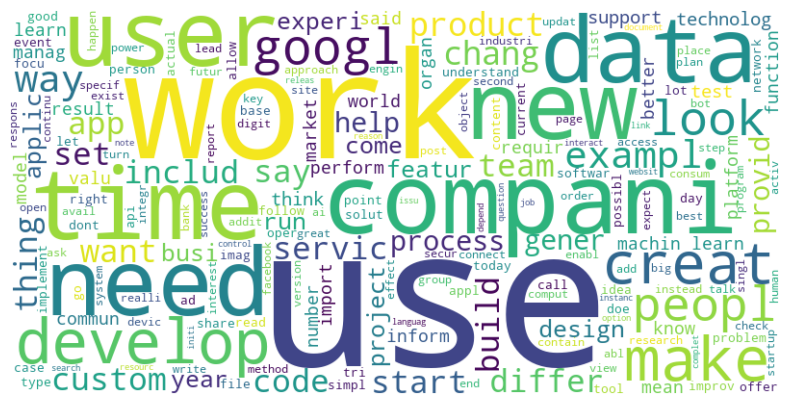

In [119]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(' '.join(df_new['data']))

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Modelling part

1. **BAG OF WORDS**

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)


In [49]:
vectorized_data = vectorizer.fit_transform(df_new["data"]).toarray()

In [50]:
vectorized_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2191, 5000))

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
similarity_score = cosine_similarity(vectorized_data)

2. **TF-IDF**

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=5000)

In [80]:
tf_vectors = tfidf.fit_transform(df_new["data"]).toarray()

In [90]:
tf_similarity = cosine_similarity(tf_vectors)

In [100]:
def recommend_article(title:str):
    title_idx = df1[df1["title"]==title].index[0]
    similar_idx_scores = list(enumerate(tf_similarity[title_idx]))
    sorted_similar_idx = sorted(similar_idx_scores,key=lambda x:x[1],reverse=True)
    recommended_idx = sorted_similar_idx[1:4]
    return recommended_idx
    

In [114]:
tit = df1["title"][1467]
tit

'The future of financial infrastructure: An ambitious look at how blockchain can reshape financial services'

In [115]:
recommended_articles = recommend_article(tit)

In [117]:
for i,val in enumerate(recommended_articles):
    print(f"{i+1} --- {df1["title"][val[0]]}\n")

1 --- Banca IMI Researcher: Blockchain Won't Work if Business Models Don't Change - CoinDesk

2 --- 4 Blockchain Macro Trends: Where to Place Your Bets

3 --- Banks' Privacy Concerns Shaping Blockchain Vendors' Strategies



In [118]:
df1.to_csv("cleaned.csv",index=False)

In [120]:
df_new.to_csv("training.csv",index=False)

In [122]:
df1.shape

(2191, 2)

In [123]:
df_new.shape

(2191, 3)